In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [5]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


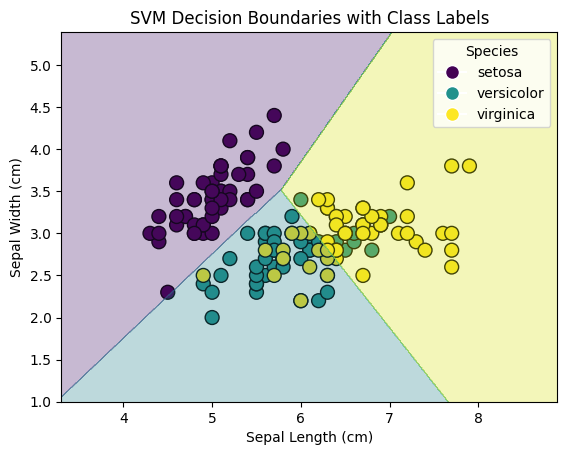

In [9]:
import numpy as np

# Use only the first two features for visualization
X_vis = X.iloc[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Train the SVM model on two features
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid for visualization
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter plot of the data points
scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)

# Add legend with class names
classes = np.unique(y)  # Get unique class labels
class_labels = iris.target_names  # Use target names from the dataset
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_labels[i],
                    markerfacecolor=scatter.cmap(scatter.norm(classes[i])), markersize=10)
                    for i in range(len(classes))]
plt.legend(handles=legend_elements, title="Species", loc="upper right")

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('SVM Decision Boundaries with Class Labels')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
